In [3]:
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
dir_in='f:/data/tc_wakes/database/info/'
dir_out='f:/data/tc_wakes/database/sst/'
#################################################################################
import datetime as dt
import xarray as xr
#from datetime import datetime
import pandas
import matplotlib as mpl
#import openpyxl
#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
import numpy as np
import math
#from math import cos, radians
#import netCDF4 # import Dataset  # http://code.google.com/p/netcdf4-python/
import os
####################you will need to change some paths here!#####################
#list of input files
dir_in='f:/data/tc_wakes/database/info/'
dir_out='f:/data/tc_wakes/database/sat_data/'
dir_mur = 'F:/data/sst/jpl_mur/v4.1/'
#output files
#filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.nc'
#filename_out_kml='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.kml'
#################################################################################
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib as mpl
#import openpyxl
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import math
#from math import cos, radians
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab as mlab
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)

In [4]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = 78.3750
for root, dirs, files in os.walk(dir_in, topdown=False):
    #print(files)
    #for ii in range(40,90): 
    for name in files:
        istart_storm=0
        #name = files[ii]
        fname_in=os.path.join(root, name)
        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat[0,:]
        lons = dsx.lon[0,:]
        dysince = dsx.time
        icycle=0
        minlon=min(lons.values)-7
        maxlon=max(lons.values)+7
        minlat=min(lats.values)-7
        maxlat=max(lats.values)+7
        if minlon<10. and maxlon>350.:  #wrapping around meridion need to cal new min/max lon
            minlon=max(lons[lons<180].values)+7
            maxlon=min(lons[lons>180].values)-7
            icycle=1 #set flag for wraparound
        dims=lats.shape
        print(dims)
        tdim=dims[0]
        tem_date=[0]*tdim #print(dysince.values)
        for i in range(0,tdim):
            tem_date[i]=date_1858+dt.timedelta(days=float(dysince[0,i].values))  #create new time array that can be queried for year etc
        minjdy = min(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        minyear =min(tem_date).year #create new time array that can be queried for year etc
        maxjdy = max(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        maxyear =max(tem_date).year  #create new time array that can be queried for year etc
        dif = max(tem_date)-min(tem_date)
        tdim=int(dif.days)  
        print(minjdy,maxjdy,minlon,maxlon,minlat,maxlat)
        ds_new=[]
        new_coord=[]
        for incr_dy in range(-5,tdim+25): #from -5 to 25 days after
            storm_date = tem_date[0]+dt.timedelta(days=incr_dy)
            
            #print(storm_date)
            syr=str(storm_date.year)
            smon=str(storm_date.month)
            sdym=str(storm_date.day)
            sjdy=str(storm_date.timetuple().tm_yday)
            fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
            mur_filename = dir_mur + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
            fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
            ccmp_filename = dir_ccmp + syr + '/M' + smon.zfill(2) + fname_tem      
            print(ccmp_filename)
            ds=xr.open_dataset(ccmp_filename,drop_variables='nobs')  #don't need nobs
            ds_day=ds.mean(dim='time')  #average over day
            #select lat/lon region
            if icycle==0:
                ds2=ds_day.sel(latitude=slice(minlat,maxlat),longitude=slice(minlon,maxlon))
            else:
                ds2=ds_day.sel(latitude=slice(minlat,maxlat),longitude=(ds_day.longitude < minlon) | (ds_day.longitude > maxlon))
            #print(ds2)
            ds_new.append(ds2)
            new_coord.append(storm_date)
            #if istart_storm==0:
            #    ds_new=ds2
            #    istart_storm=1
            #else:
            #    ds_new=xr.concat(ds_new,ds2,dim='incr_dy')
            #istart_storm=istart_storm+1
            #if istart_storm==4:
            #    break
        combined = xr.concat(ds_new, dim='time')
        combined.coords['time'] = new_coord
        fname_out=dir_out + 'ccmp' + str(ii) + '.nc'
        print(fname_out)
        combined.to_netcdf(fname_out)
        #break
    #break
#print(ds_new)


001annual_storm_info.nc f:/data/tc_wakes/database/info/2004\001annual_storm_info.nc
(26,)
271 277 56.299998585134745 74.3999984934926 -13.999999843537807 2.8000000938773155
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030923_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030924_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030925_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030926_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030927_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030928_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030929_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M09/CCMP_Wind_Analysis_20030930_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M10/CCMP_Wind_Analysis_20031001_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/Y2003/M10/CCMP_Wind_Analysis_20031002_V02.0

KeyboardInterrupt: 

In [19]:
ccmp_filename

'F:/data/sat_data/ccmp/v02.0/Y2003/M10/CCMP_Wind_Analysis_20031009_V02.0_L3.0_RSS.nc'

In [10]:
ds_target=xr.open_dataset(ccmp_filename)  #don't need nobs
ds_target_lon=ds_target.longitude
ds_target_lat=ds_target.latitude
ds=xr.open_dataset(mur_filename,drop_variables=('analysis_error','sea_ice_fraction'))  #don't need nobs
ds_rolled = ds.assign_coords(lon=(ds.lon % 360)).roll(lon=(ds.dims['lon'] // 2))
#select lat/lon region
sst=ds_rolled.analysed_sst


<xarray.DataArray 'analysed_sst' (time: 1, lat: 17999, lon: 36000)>
array([[[   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan],
        ...,
        [271.35, 271.35, ..., 271.35, 271.35],
        [271.35, 271.35, ..., 271.35, 271.35]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-10-09T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 -89.95 -89.94 -89.93 ...
  * lon      (lon) float32 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ...
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        "Final" version using Multi-Resolution Variational Analys...
    source:         AMSRE-REMSS, AVHRR_Pathfinder-PFV5.2-NODC_day, AVHRR_Path...

In [17]:
#print(ds_target_lat,ds_target_lon)
ds2 = sst.interp(lat=ds_target_lat,lon=ds_target_lon)
ds2

<xarray.DataArray 'analysed_sst' (time: 1, latitude: 628, longitude: 1440)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [275.59576, 275.63925, ..., 275.10925, 275.383  ],
        [274.9395 , 275.026  , ..., 274.55725, 274.56424]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2003-10-09T09:00:00
    lat        (latitude) float32 -78.375 -78.125 -77.875 -77.625 -77.375 ...
    lon        (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 ...
  * latitude   (latitude) float32 -78.375 -78.125 -77.875 -77.625 -77.375 ...
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 ...
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        "Final" version using Multi-Resolution Variational

In [13]:
#from scipy import interpolate
#from scipy.interpolate import griddata


In [18]:
#ds2[0,:,:].plot()


In [156]:
ds2=ds_day.sel(latitude=slice(minlat,maxlat),longitude=slice(minlon,maxlon))
coarseness = 25
temp = mlon.reshape((mlon.shape[0] // coarseness, coarseness))
coarse_mlon = np.nanmean(temp, axis=(1), dtype=np.float64)
temp = mlat.reshape((mlat.shape[0] // coarseness, coarseness))
coarse_mlat = np.nanmean(temp, axis=(1), dtype=np.float64)
temp = sst.reshape((sst.shape[0] // coarseness, coarseness, sst.shape[1] // coarseness, coarseness))
coarse_sst = np.nanmean(temp, axis=(1,3), dtype=np.float64)


<xarray.Dataset>
Dimensions:       (lat: 17999, lon: 36000, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2003-10-08T09:00:00
  * lat           (lat) float32 -89.99 -89.98 -89.97 -89.96 -89.95 -89.94 ...
  * lon           (lon) float32 -179.99 -179.98 -179.97 -179.96 -179.95 ...
Data variables:
    analysed_sst  (time, lat, lon) float32 ...
    mask          (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    comment:                    MUR = "Multi-scale Ultra-high Reolution"
    license:                    These data are available free of charge under...
    id:                    

In [2]:
#regrid mur onto ccmp grid
###### dir_mur = 'F:/data/sst/jpl_mur/v4.1/'
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = 78.3750
for root, dirs, files in os.walk(dir_in, topdown=False):
    #print(files)
    for ii in range(12,13): 
    #for name in files:
        name = files[ii]
        fname_in=os.path.join(root, name)
        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat
        lons = dsx.lon
        dysince = dsx.time
        minlon=min(lons[0,:].values)-7
        maxlon=max(lons[0,:].values)+7
        minlat=min(lats[0,:].values)-7
        maxlat=max(lats[0,:].values)+7
        print(minlon,maxlon,minlat,maxlat)

        ix1=int(round((minlon+dx_offset)/dx))
        ix2=int(round((maxlon+dx_offset)/dx))
        iy1=int(round((minlat+dy_offset)/dy))
        iy2=int(round((maxlat+dy_offset)/dy))
        if iy2 > 628:
            iy2=628
        if iy1 < 1:
            iy1=1    
        if ix1 < 0:
            ix1 = ix1 + 1440
        if ix2 < 0:
            ix2 = ix2 + 1440
        #if ix1 > 1440:
        #    ix1 = ix1 - 1440
        #if ix2 > 1440:
        #    ix2 = ix2 - 1440
        print(minlon,maxlon,minlat,maxlat)
        xdim=ix2-ix1
        ydim=iy2-iy1
        
        dims=lats.shape
        tdim=dims[1]
        tem_date=[0]*tdim #print(dysince.values)
        for i in range(0,tdim):
            tem_date[i]=date_1858+dt.timedelta(days=float(dysince[0,i].values))  #create new time array that can be queried for year etc
        minjdy = min(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        minyear =min(tem_date).year #create new time array that can be queried for year etc
        maxjdy = max(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        maxyear =max(tem_date).year  #create new time array that can be queried for year etc
        dif = max(tem_date)-min(tem_date)
        tdim=int(dif.days)+25

        print(tdim,ix1,ix2,iy1,iy2)      

        if xdim>720:
            ix1=int(round((minlon+dx_offset)/dx))+1440 #for when wraps 180 to -180
            ix2=int(round((maxlon+dx_offset)/dx))
            xdim=abs(xdim-1440) 
            
        
        for i in range(0,1): #tdim):
            storm_date = tem_date[0]+dt.timedelta(days=i)
            #print(storm_date)
            
            syr=str(storm_date.year)
            smon=str(storm_date.month)
            sdym=str(storm_date.day)
            sjdy=str(storm_date.timetuple().tm_yday)
            fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
            mur_filename = dir_mur + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
            fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
            ccmp_filename = dir_ccmp + syr + '/M' + smon.zfill(2) + fname_tem      

            if storm_date.timetuple().tm_yday==366:
                sjdy = '365'
            clim_filename='F:/data/sst/jpl_mur/v4.1/clim/clim2_' + sjdy.zfill(3) +'_2003_2013_MUR-GLOB-v02.0-fv04.1.nc'
            ccmp_clim_filename='F:/data/sat_data/ccmp/v02.0/clim/ccmp_daily_clim_' + sjdy.zfill(3) +'.nc'
            print(ccmp_filename)
            print(ccmp_clim_filename)
            nc_fid = Dataset(mur_filename, 'r')
            nc_fid2 = Dataset(clim_filename, 'r')                      
            sst = nc_fid.variables['analysed_sst'][0,1149:16849,:]
            mlat = nc_fid.variables['lat'][1149:16849]
            mlon = nc_fid.variables['lon'][:]
            sst_clim = nc_fid2.variables['sst'][1149:16849,:]
            nc_fid.close()
            nc_fid2.close()
            
            coarseness = 25
            temp = mlon.reshape((mlon.shape[0] // coarseness, coarseness))
            coarse_mlon = np.nanmean(temp, axis=(1), dtype=np.float64)
            temp = mlat.reshape((mlat.shape[0] // coarseness, coarseness))
            coarse_mlat = np.nanmean(temp, axis=(1), dtype=np.float64)
            temp = sst.reshape((sst.shape[0] // coarseness, coarseness, sst.shape[1] // coarseness, coarseness))
            coarse_sst = np.nanmean(temp, axis=(1,3), dtype=np.float64)
            temp = sst_clim.reshape((sst_clim.shape[0] // coarseness, coarseness, sst_clim.shape[1] // coarseness, coarseness))
            coarse_sst_clim = np.nanmean(temp, axis=(1,3), dtype=np.float64)
            continue
        continue
    continue
    
      
        
        

014annual_storm_info.nc f:/data/tc_wakes/database/info/2004\014annual_storm_info.nc
119.09999718144536 148.49999683722854 -21.999999664723873 -5.699999716132879
119.09999718144536 148.49999683722854 -21.999999664723873 -5.699999716132879
31 1197 1314 226 291
F:/data/sat_data/ccmp/v02.0/Y2004/M02/CCMP_Wind_Analysis_20040227_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/clim/ccmp_daily_clim_058.nc
016annual_storm_info.nc f:/data/tc_wakes/database/info/2005\016annual_storm_info.nc
50.59999871253967 79.29999838396907 -44.79999915510416 -3.499999765306711
50.59999871253967 79.29999838396907 -44.79999915510416 -3.499999765306711
32 923 1038 134 300
F:/data/sat_data/ccmp/v02.0/Y2005/M01/CCMP_Wind_Analysis_20050129_V02.0_L3.0_RSS.nc
F:/data/sat_data/ccmp/v02.0/clim/ccmp_daily_clim_029.nc
017annual_storm_info.nc f:/data/tc_wakes/database/info/2006\017annual_storm_info.nc
101.19999758154154 125.8999973423779 -28.49999951943755 -4.299999747425318
101.19999758154154 125.8999973423779 -28.499999519

IndexError: list index out of range

In [3]:
temp = sst.reshape((sst.shape[0] // coarseness, coarseness, sst.shape[1] // coarseness, coarseness))
coarse_sst = np.mean(temp, axis=(1,3), dtype=np.float64)


In [8]:
coarse_sst.shape

(628, 1440)

In [152]:
coarse_sst[1:5,200:201]


masked_array(
  data=[[--],
        [--],
        [--],
        [--]],
  mask=[[ True],
        [ True],
        [ True],
        [ True]],
  fill_value=1e+20,
  dtype=float64)

In [9]:
print(ccmp_filename)
nc_fid = Dataset(ccmp_filename, 'r')
nc_fid2 = Dataset(ccmp_clim_filename, 'r')  
tem = nc_fid.variables['uwnd'][:]
tem = np.mean(tem,axis=0)
wndu = np.append(tem[:,720:],tem[:,:720], axis=1)               
tem = nc_fid.variables['vwnd'][:]
tem = np.mean(tem,axis=0)
wndv = np.append(tem[:,720:],tem[:,:720], axis=1)               
mlat_ccmp = nc_fid.variables['latitude'][:]
tem = nc_fid.variables['longitude'][:]
mlon_ccmp = np.append(tem[720:],tem[:720], axis=0)               
mlon_ccmp = ((mlon_ccmp - 180) % 360) - 180  #make -180 to 180 rather than 0 360
tem = nc_fid2.variables['av_u'][:]
wndu_clim = np.append(tem[:,720:],tem[:,:720], axis=1)               
tem = nc_fid2.variables['av_v'][:]
wndv_clim = np.append(tem[:,720:],tem[:,:720], axis=1)               
nc_fid.close()
nc_fid2.close()
 


F:/data/sat_data/ccmp/v02.0/Y2016/M02/CCMP_Wind_Analysis_20160209_V02.0_L3.0_RSS.nc


In [82]:
ccmp_filename
ds=xr.open_dataset(ccmp_filename)
ds_day=ds.mean(dim='time')  #average over day
#wndu=ds.uwnd.mean(dim='time') #wndv=ds.vwnd.mean(dim='time')
#select lat/lon region
ds2=ds_day.sel(latitude=slice(minlat,maxlat),longitude=(ds_day.longitude < minlon) | (ds_day.longitude > maxlon))


<xarray.Dataset>
Dimensions:    (latitude: 96, longitude: 400)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 ...
  * latitude   (latitude) float32 -32.875 -32.625 -32.375 -32.125 -31.875 ...
Data variables:
    uwnd       (latitude, longitude) float32 3.4160802 3.1673741 2.9120088 ...
    vwnd       (latitude, longitude) float32 -7.3476386 -7.4907694 ...
    nobs       (latitude, longitude) float32 0.25 0.75 1.0 1.0 1.25 1.5 1.25 ...

-33 -9 10 270
<xarray.Dataset>
Dimensions:    (latitude: 96, longitude: 400, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 ...
  * latitude   (latitude) float32 -32.875 -32.625 -32.375 -32.125 -31.875 ...
  * time       (time) datetime64[ns] 2016-02-09 2016-02-09T06:00:00 ...
Data variables:
    uwnd       (time, latitude, longitude) float32 -1.1021696 -1.0759568 ...
    vwnd       (time, latitude, longitude) float32 -8.584083 -8.347971 ...
    nobs       (time, latitude, longitude) float32 ...
Attributes:
    contact:                    Remote Sensing Systems, support@remss.com
    Conventions:                CF-1.6
    data_structure:             grid
    title:                      RSS CCMP V2.0 derived surface winds (Level 3.0)
    history:                    20160831T115941ZZ - netCDF generated from ori...
    description:                RSS VAM 6-hour analyses starting from the ERA...
    summary:                    CCMP V2.0 h

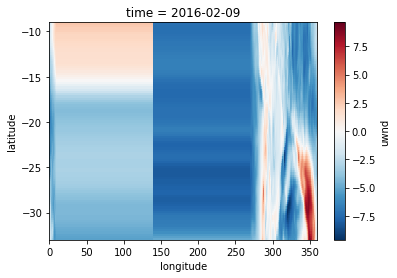

In [78]:
minlat=-33
maxlat=-9
minlon=10
maxlon=270
print(minlat,maxlat,minlon,maxlon)
#ds2=ds.sel(latitude=(ds.latitude>=minlat & ds.latitude<=maxlat)) # & ds.longitude>=minlon & ds.longitude<=maxlon)
#wndu2=wndu.sel(latitude=(ds.latitude>=minlat & ds.latitude<=maxlat)) # & longitude=(ds.longitude < minlon) | (ds.longitude > maxlon))
ds2=ds.sel(latitude=slice(minlat,maxlat),longitude=(ds.longitude < minlon) | (ds.longitude > maxlon))
print(ds2)
#ds_rolled = ds.assign_coords(longitude=(ds.longitude % 360)).roll(longitude=(ds.dims['longitude'] // 2))
#mask = ds_rolled.longitude > 180
#ds_rolled.longitude[mask] = ds_rolled.longitude[mask] - 360.
#ds_rolled.uwnd[0,:,:].plot()
#print(ds_rolled.longitude[0].data,ds_rolled.longitude[-1].data,ds_rolled.longitude[710].data)
wndu2=wndu.sel(latitude=slice(minlat,maxlat),longitude=slice(minlon,maxlon))
ds2.uwnd[0,:,:].plot()

#ds.sel(lon=(ds.lon < -80) | (ds.lon > 40))
#ds_rolled = ds.assign_coords(lon=(ds.lon % 360)).roll(lon=(ds.dims['lon'] // 2))
#inside = np.logical_and(np.logical_and(lons >= west,
#                                       lons <= east),
#                        np.logical_and(lats >= south,
#                                       lats <= north))

In [20]:
wndu.shape

(628, 1440)

In [260]:
#make a box mask for storm data
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750
xdim=1440
ydim=628
#print(type(lats),ydim,xdim)
#print(lats.shape,tdim)
#print(lons[0,25].values)
#print(lons[0,24].values)
#print(lons[0,23].values)
storm_mask = np.ones([ydim,xdim], dtype=bool)
for i in range(0,26):
    float(lats[0,i].values)
    lat1 = int(round((float(lats[0,i].values)-7-dy_offset)/dy))
    lon1 = int(round((float(lons[0,i].values)-7-dx_offset)/dx))
    lat2 = int(round((float(lats[0,i].values)+7-dy_offset)/dy))+1
    lon2 = int(round((float(lons[0,i].values)+7-dx_offset)/dx))+1 #python index goes from index1 up to but not including index2
    if lat2>628:
        lat2=628
    if lat1<0:
        lat1=0
    if lon1>=0 and lon2<=xdim:
        storm_mask[lat1:lat2,lon1:lon2]=bool(0)
    if lon1<0 and lon2<=xdim:
        storm_mask[lat1:lat2,:lon2]=1.
        storm_mask[lat1:lat2,lon1+1440:]=bool(0)
    if lon1>=0 and lon2>xdim:
        storm_mask[lat1:lat2,lon1:]=1.
        storm_mask[lat1:lat2,:lon2-1440:]=bool(0)
    #print(lats[0,i].values,lons[0,i].values,lat1,lat2,lon1,lon2)
sst2=coarse_sst[:]
#sst_mask = np.ma.masked_array(storm_mask, 0)  
sst_mask2 = coarse_sst.mask
print(type(sst_mask2))
print(sst_mask2.shape,storm_mask.shape)
sst_mask2[storm_mask==bool(1)]=bool(1)
sst2.mask = sst_mask2
sst_clim.mask = sst_mask2
#wndu.mask = sst_mask2
#sst_mask2.plot()
#
#sst2.mask = sst_mask2

<class 'numpy.ndarray'>
(628, 1440) (628, 1440)


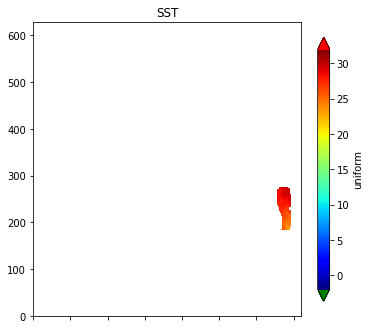

In [258]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 5.4))
# plot using 'continuous' color map
im = ax1.imshow(sst2-273.15, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-2.0, vmax=32.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax1.set_title('SST')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
plt.show()

In [182]:
wndu[1:5,1:5]
print(wndu.shape)

(628, 1440)


In [175]:
print(coarse_mlon[0:5],coarse_mlon[720:725])
print(mlon_ccmp[0:5],mlon_ccmp[720:725])
print(mlon_ccmp2[0:5],mlon_ccmp2[720:725])
print(type(mlon_ccmp))

[-179.87 -179.62 -179.37 -179.12 -178.87] [0.13 0.38 0.63 0.88 1.13]
[-179.875 -179.625 -179.375 -179.125 -178.875] [0.125 0.375 0.625 0.875 1.125]
[-179.875 -179.625 -179.375 -179.125 -178.875] [0.125 0.375 0.625 0.875 1.125]
<class 'numpy.ndarray'>


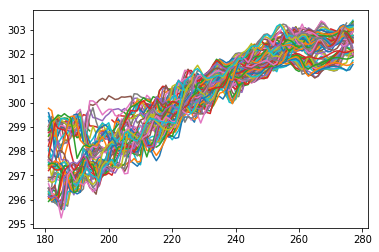

In [265]:
#plt.plot(coarse_sst)
#coarse_sst[coarse_sst.mask == 1].plot()
#plt.show()

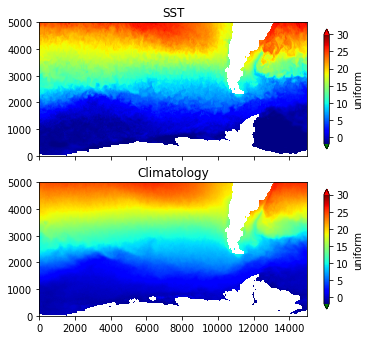

In [142]:

# set up the axes
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5.4))
# plot using 'continuous' color map
im = ax1.imshow(sst[0:5000,0:15000]-273.15, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-2.0, vmax=30.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax1.set_title('SST')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
im = ax2.imshow(sst_clim[0:5000,0:15000], interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-2.0, vmax=30.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax2.set_title('Climatology')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax2)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
plt.show()

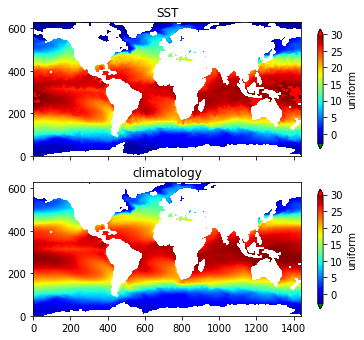

In [177]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5.4))
# plot using 'continuous' color map
im = ax1.imshow(coarse_sst-273.15, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-3.0, vmax=30.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax1.set_title('SST')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
im = ax2.imshow(coarse_sst_clim, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-3.0, vmax=30.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax2.set_title('climatology')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax2)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
plt.show()

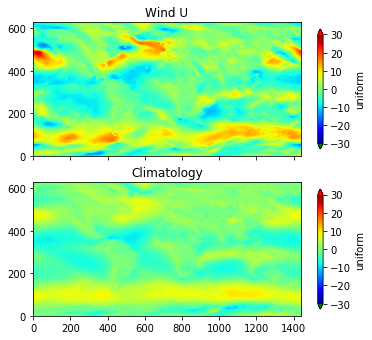

In [191]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 5.4))
# plot using 'continuous' color map
im = ax1.imshow(wndu, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-30.0, vmax=30.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax1.set_title('Wind U')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
im = ax2.imshow(wndu_clim, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-30.0, vmax=30.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax2.set_title('Climatology')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax2)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
plt.show()

In [121]:
# Suppose the 2D array is pop_density

coarseness = 25
sst2=sst[0,0:1625,0:2925]
print(type(sst2),sst2.shape,sst2[1:5,1:5])
sst2[sst2==-23767]=np.nan
print(type(sst2),sst2.shape,sst2[1:5,1:5])
temp = sst2.reshape((sst2.shape[0] // coarseness, coarseness, sst2.shape[1] // coarseness, coarseness))
coarse_sst = np.nanmean(temp, axis=(1,3), dtype=np.float64)
print(coarse_sst.shape)

IndexError: too many indices for array

002annual_storm_info.nc f:/data/tc_wakes/database/info/2008\002annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\002.pdf
003annual_storm_info.nc f:/data/tc_wakes/database/info/2008\003annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\003.pdf
004annual_storm_info.nc f:/data/tc_wakes/database/info/2008\004annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\004.pdf
005annual_storm_info.nc f:/data/tc_wakes/database/info/2008\005annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\005.pdf
006annual_storm_info.nc f:/data/tc_wakes/database/info/2008\006annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\006.pdf
007annual_storm_info.nc f:/data/tc_wakes/database/info/2008\007annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\007.pdf
008annual_storm_info.nc f:/data/tc_wakes/database/info/2008\008annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\008.pdf
009annual_storm_info.nc f:/data/tc_wakes/database/info/2008\009annual_storm_info.nc
f:/data/tc_wakes/database/s

C:\Users\gentemann\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


f:/data/tc_wakes/database/sst/2008\023.pdf
024annual_storm_info.nc f:/data/tc_wakes/database/info/2008\024annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\024.pdf
027annual_storm_info.nc f:/data/tc_wakes/database/info/2008\027annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\027.pdf
028annual_storm_info.nc f:/data/tc_wakes/database/info/2008\028annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\028.pdf
029annual_storm_info.nc f:/data/tc_wakes/database/info/2008\029annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\029.pdf
031annual_storm_info.nc f:/data/tc_wakes/database/info/2008\031annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\031.pdf
036annual_storm_info.nc f:/data/tc_wakes/database/info/2008\036annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\036.pdf
037annual_storm_info.nc f:/data/tc_wakes/database/info/2008\037annual_storm_info.nc
f:/data/tc_wakes/database/sst/2008\037.pdf
038annual_storm_info.nc f:/data/tc_wakes/database/info/2008\038annua

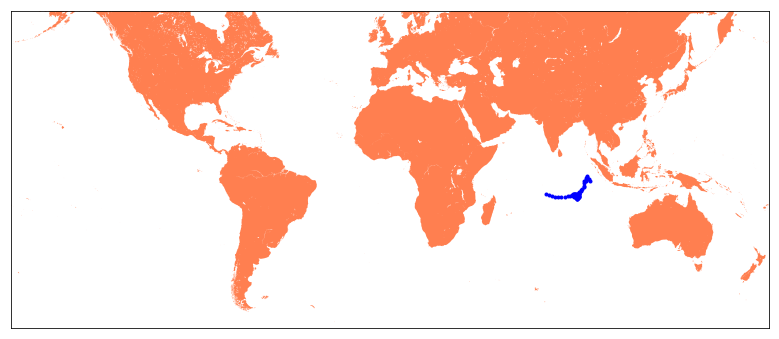

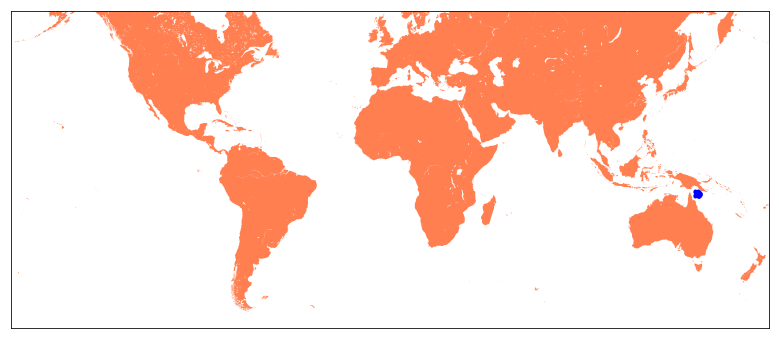

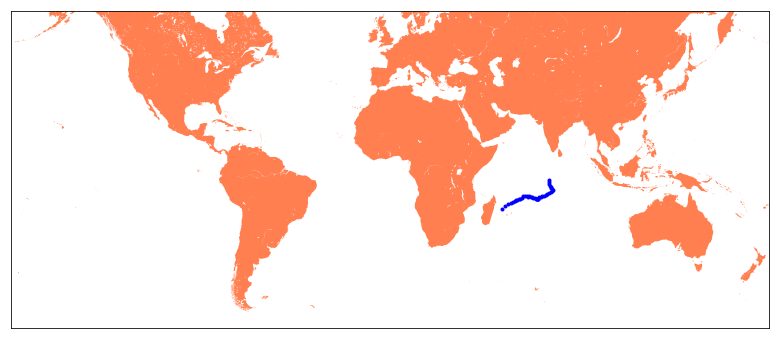

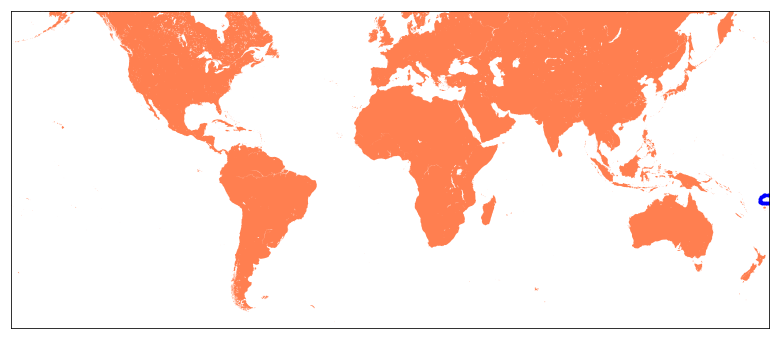

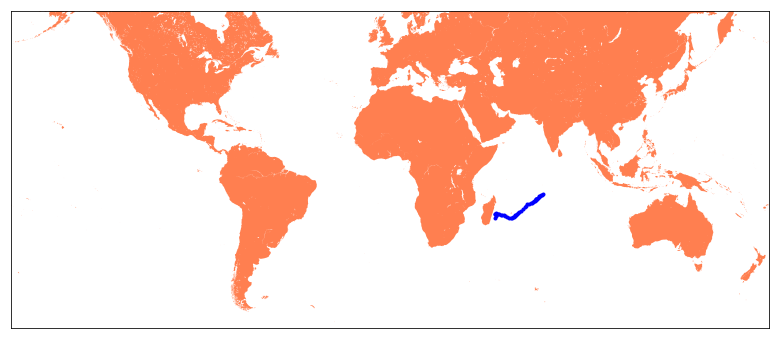

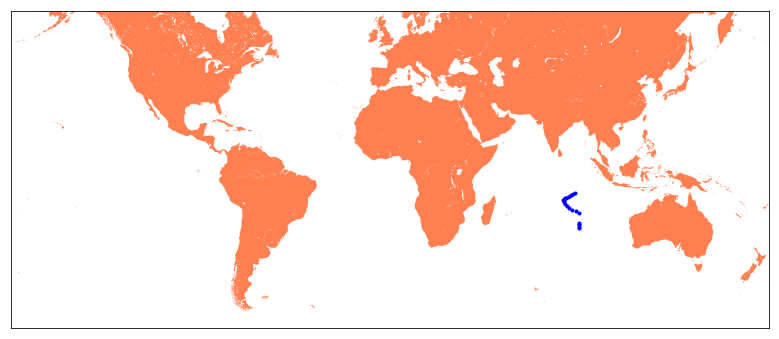

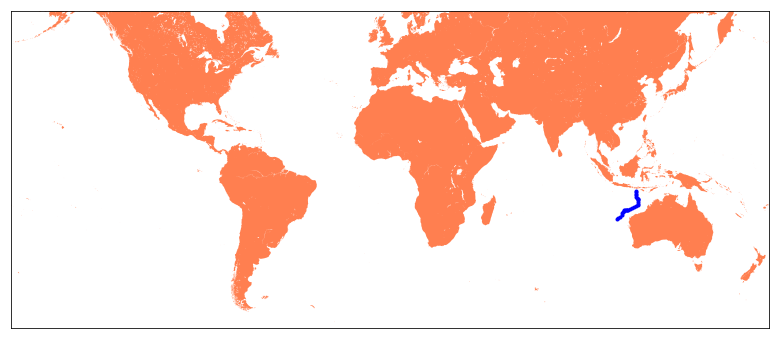

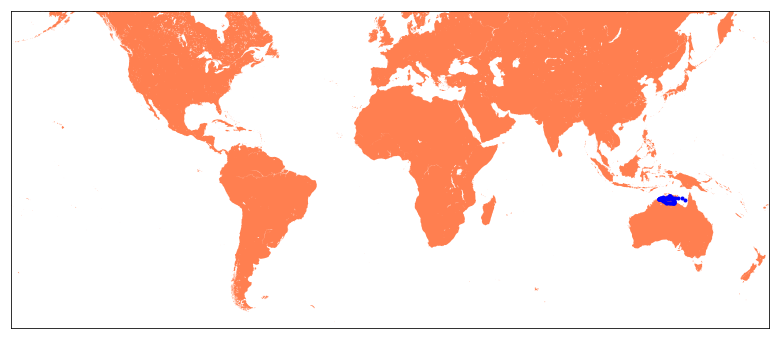

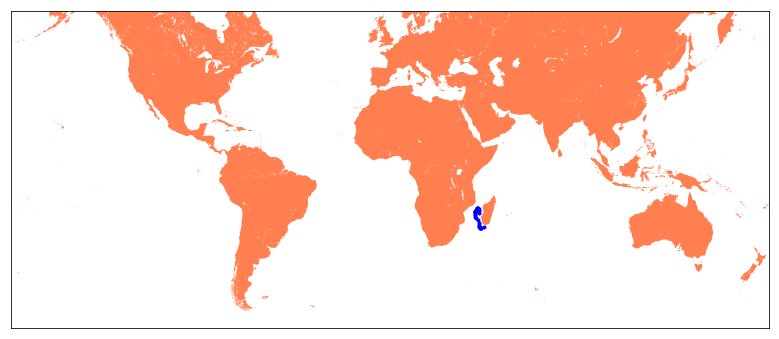

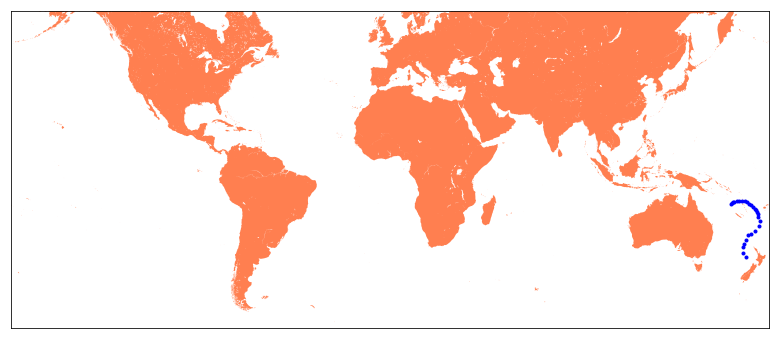

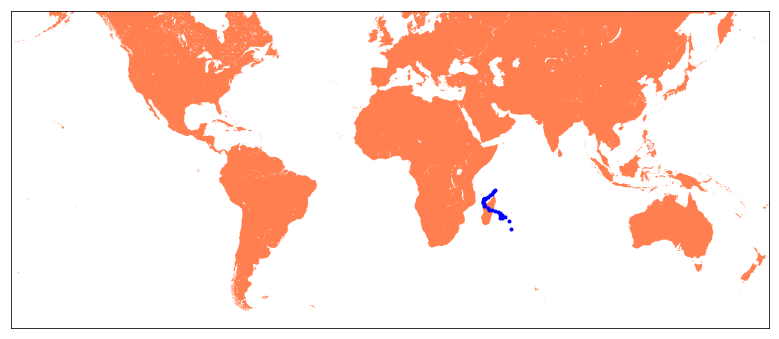

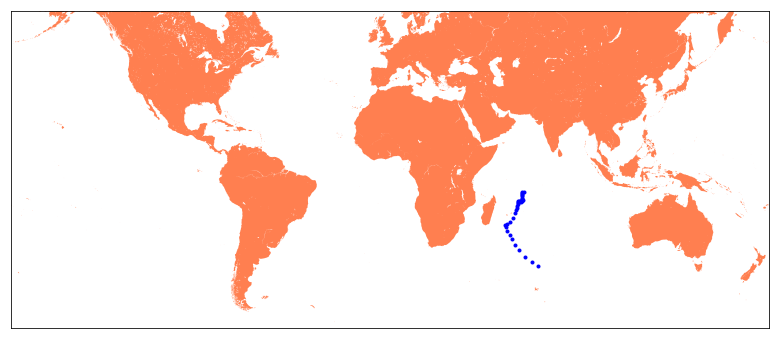

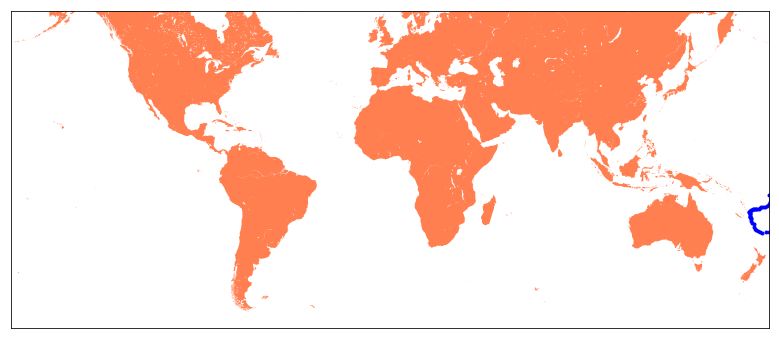

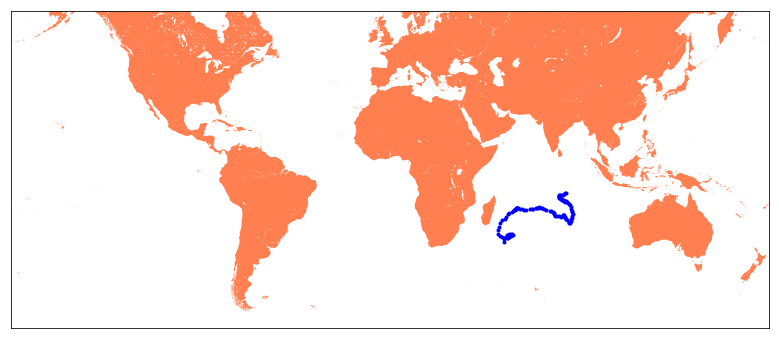

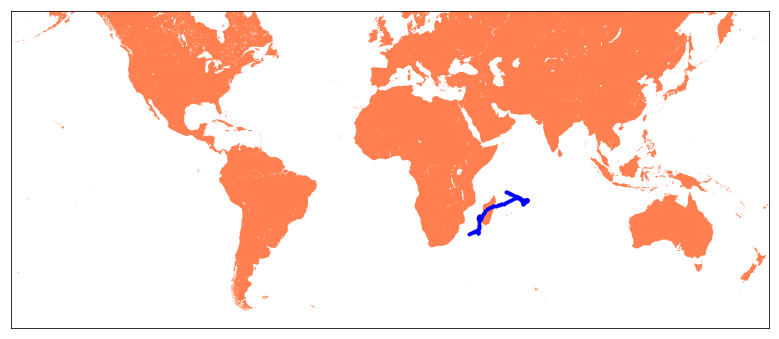

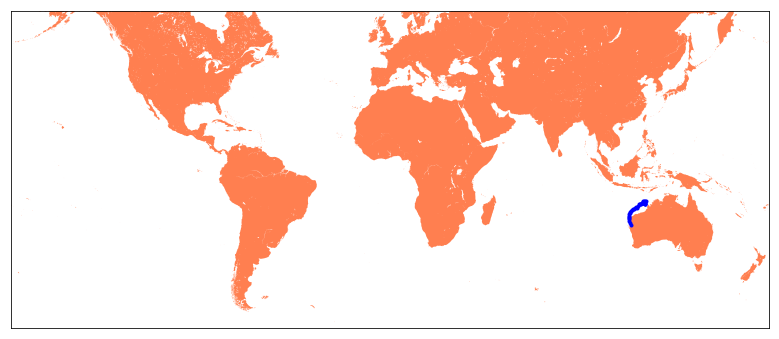

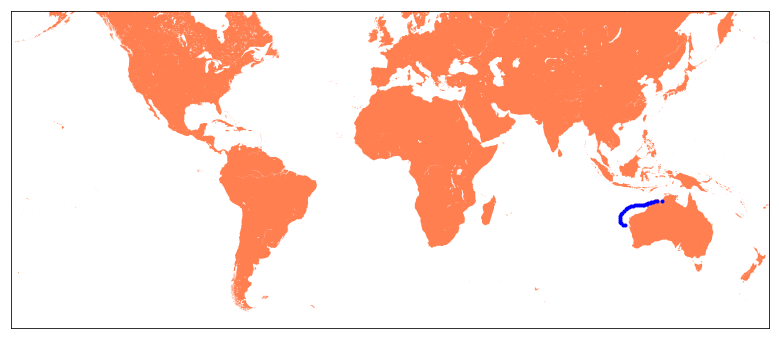

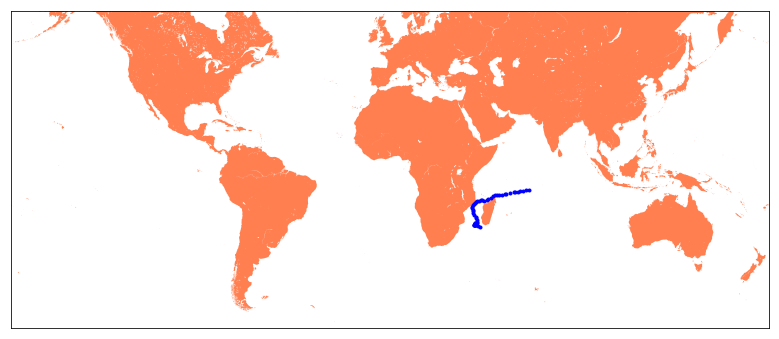

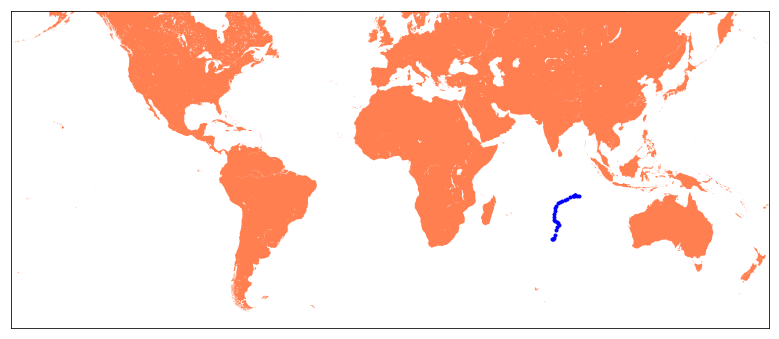

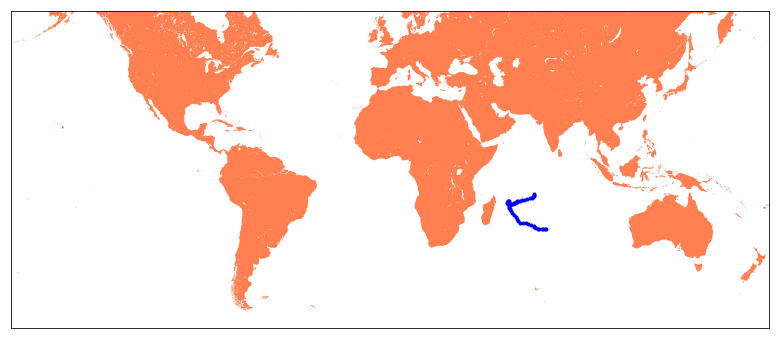

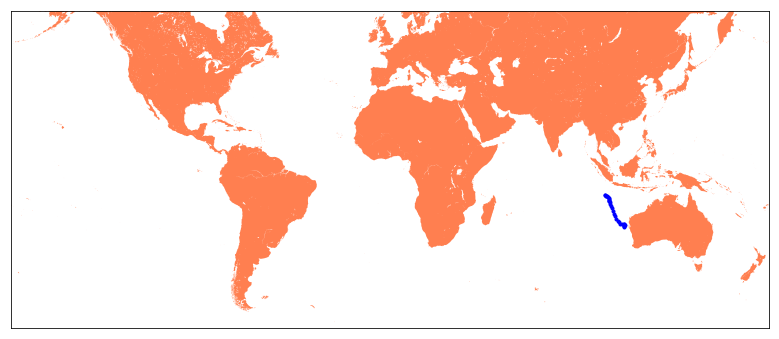

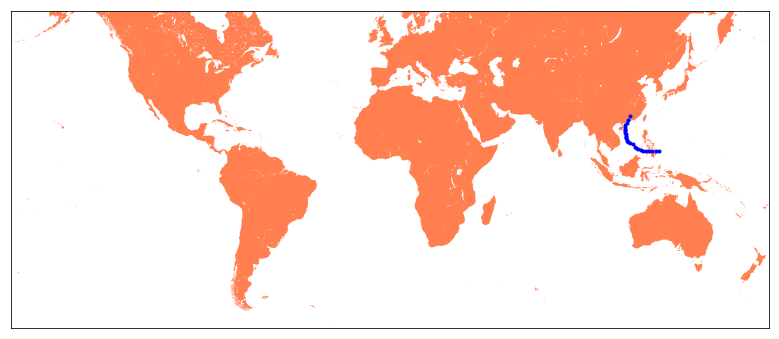

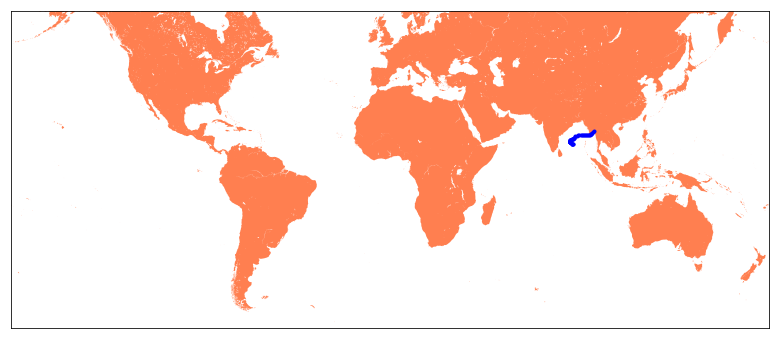

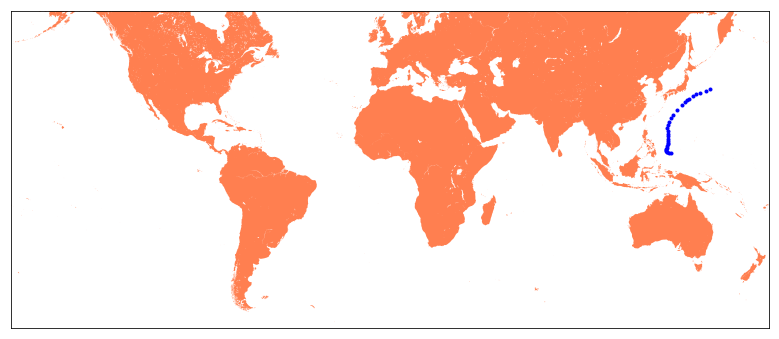

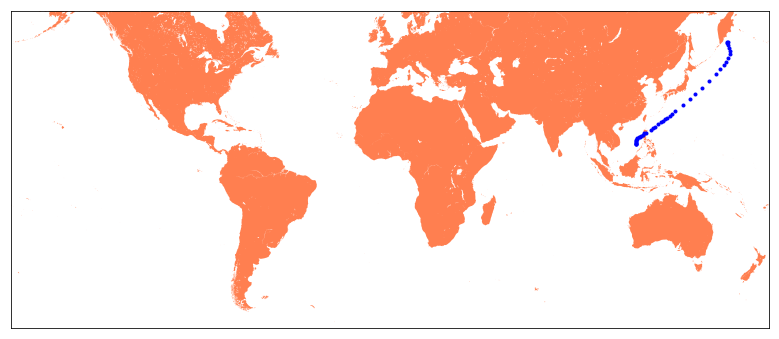

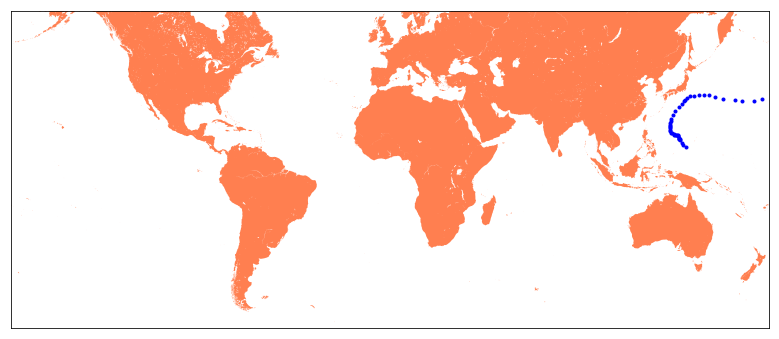

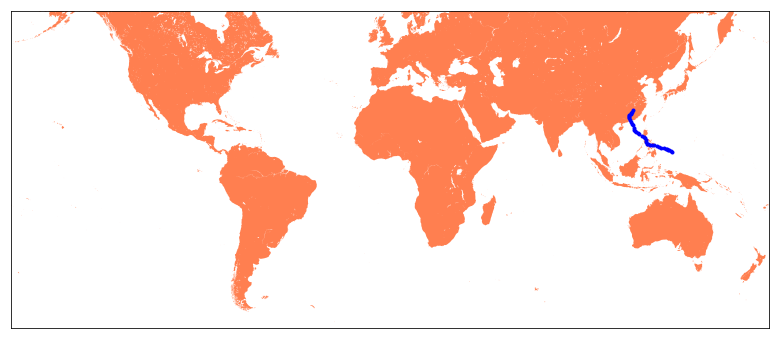

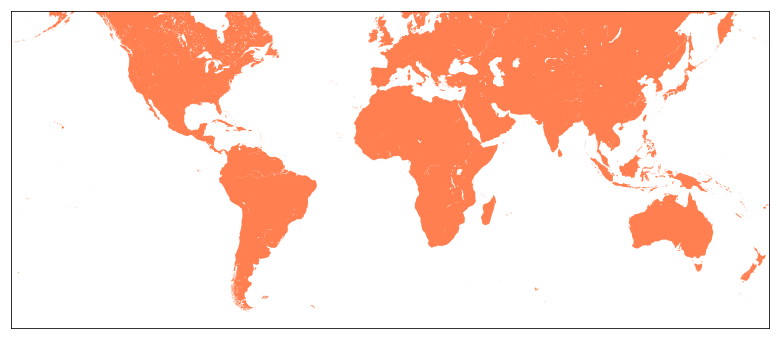

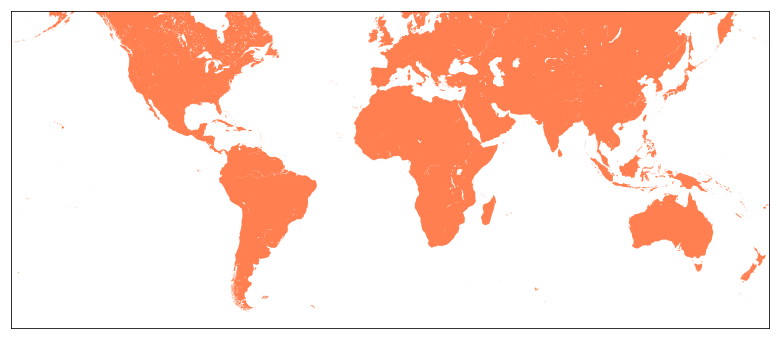

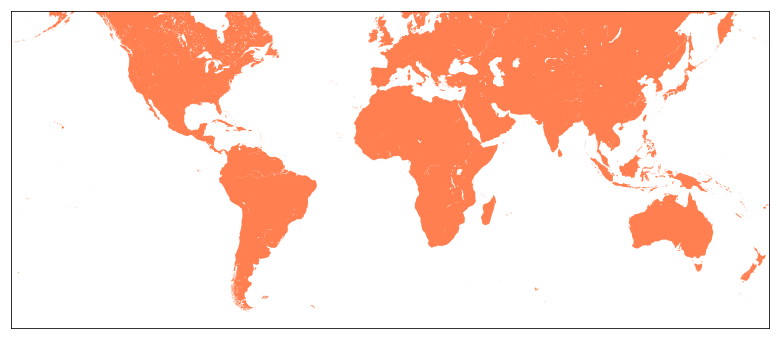

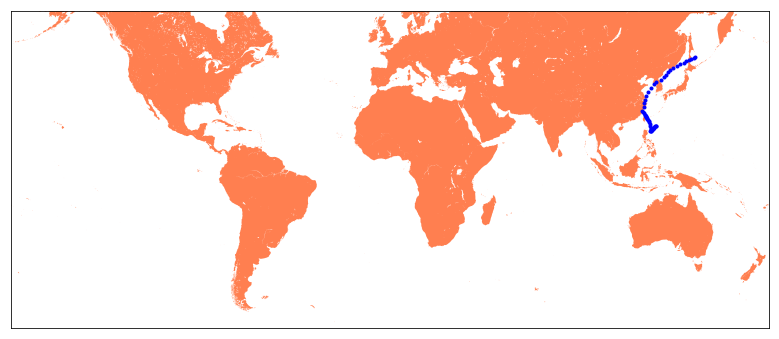

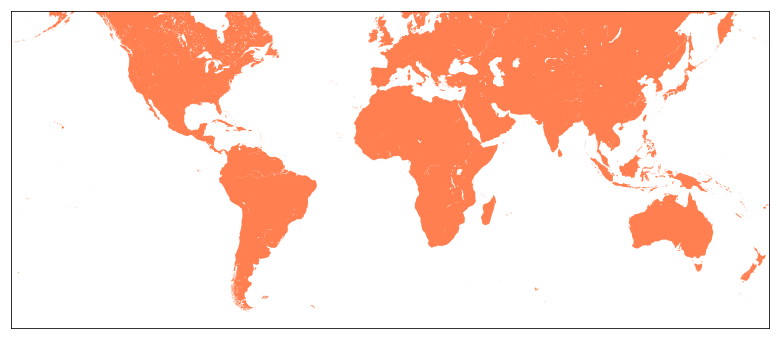

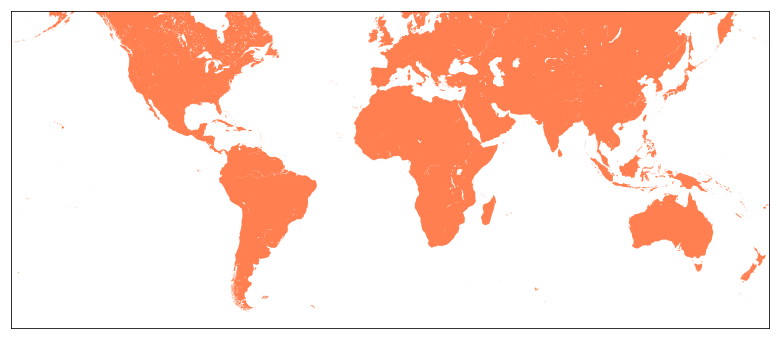

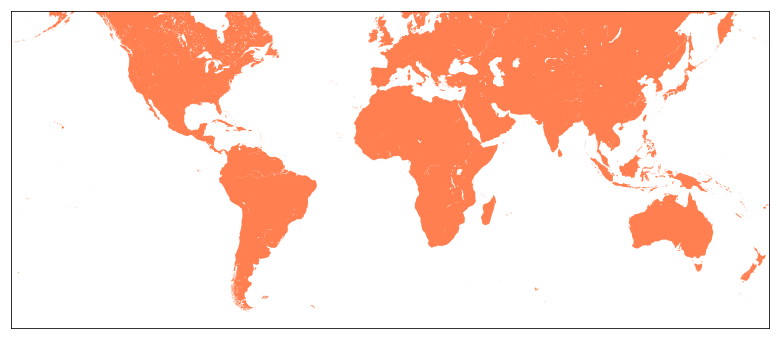

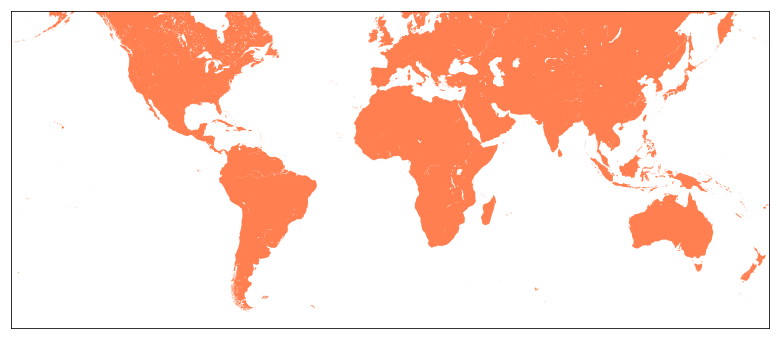

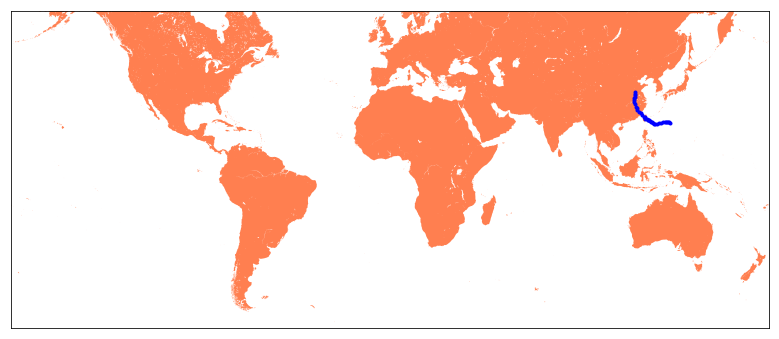

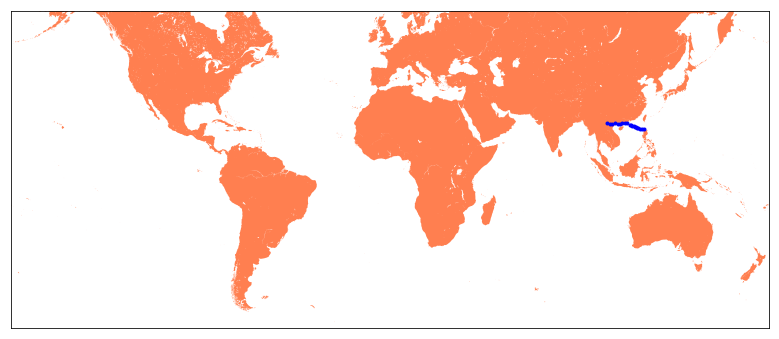

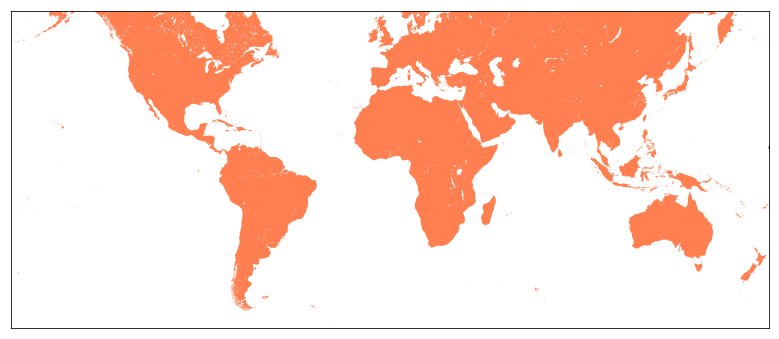

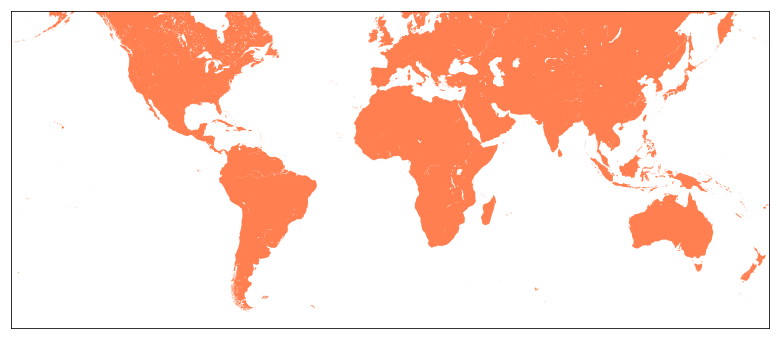

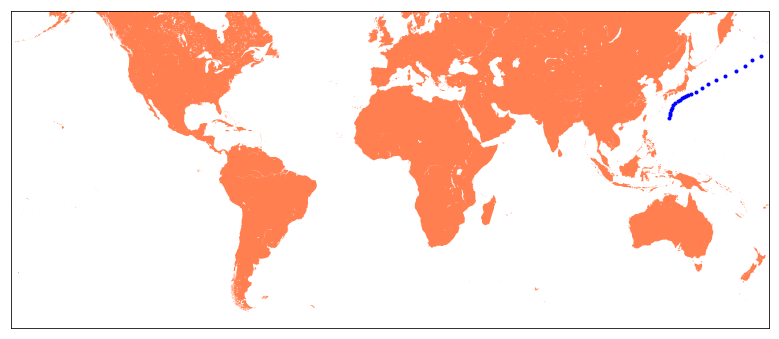

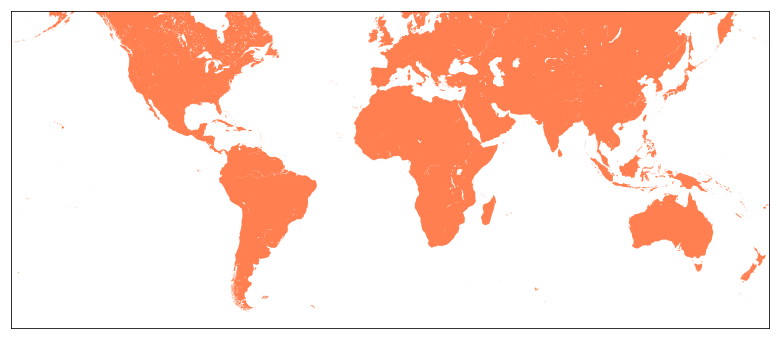

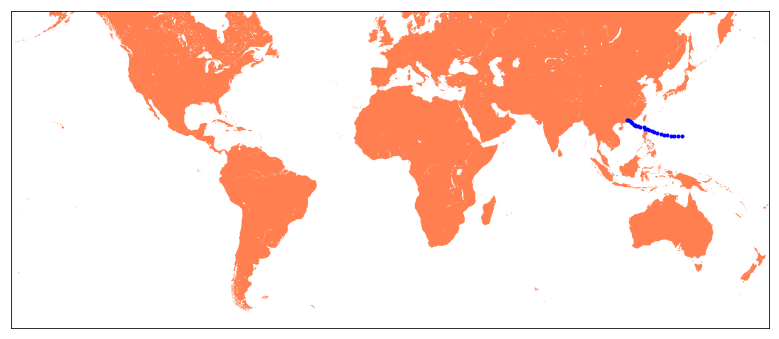

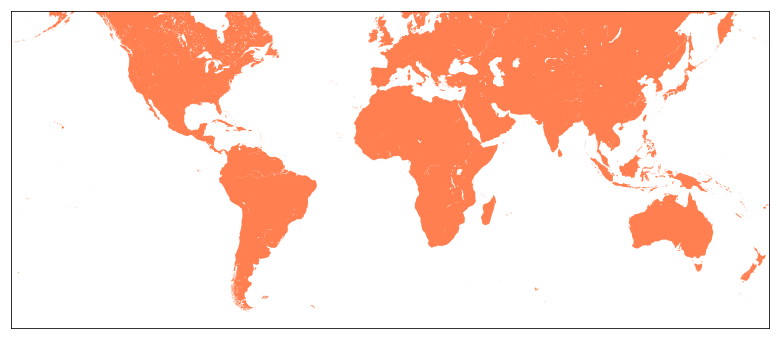

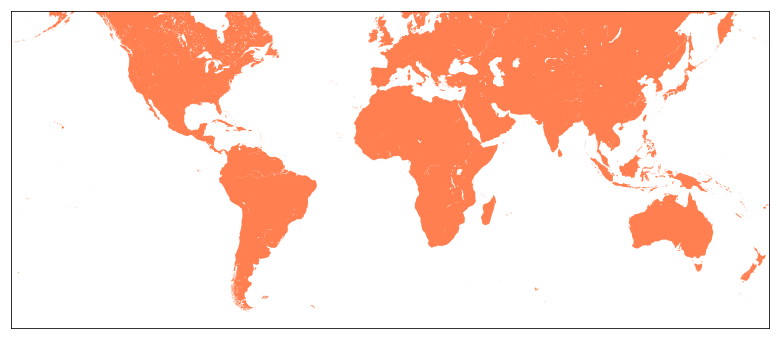

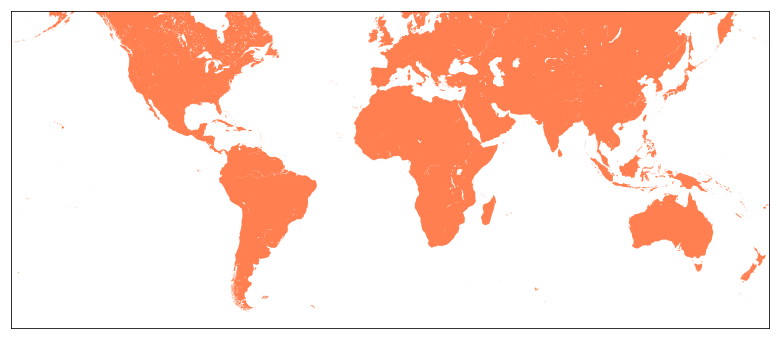

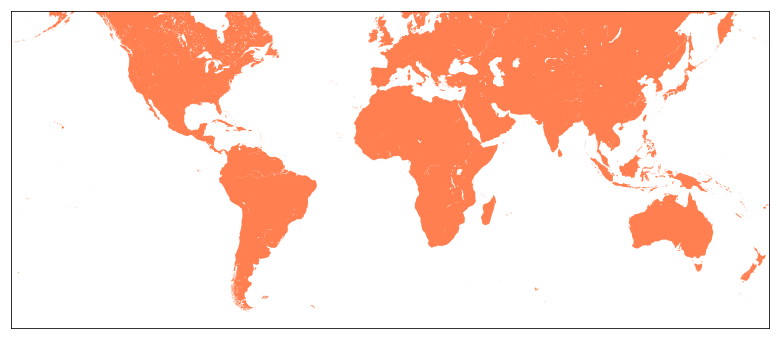

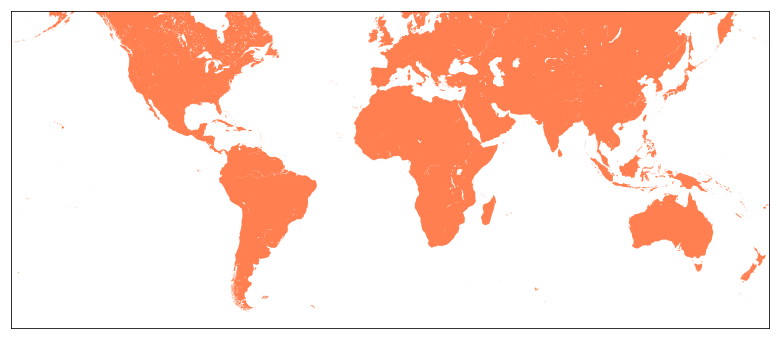

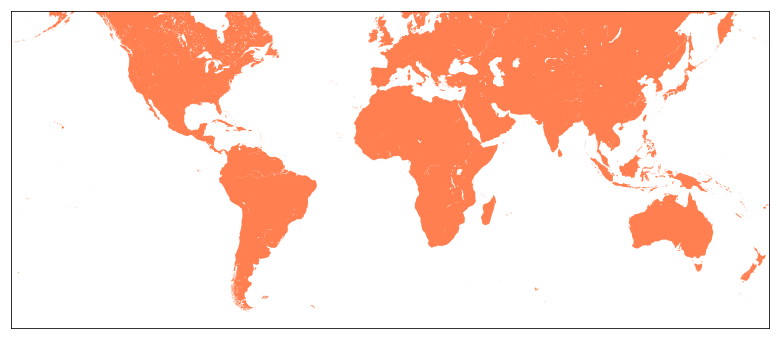

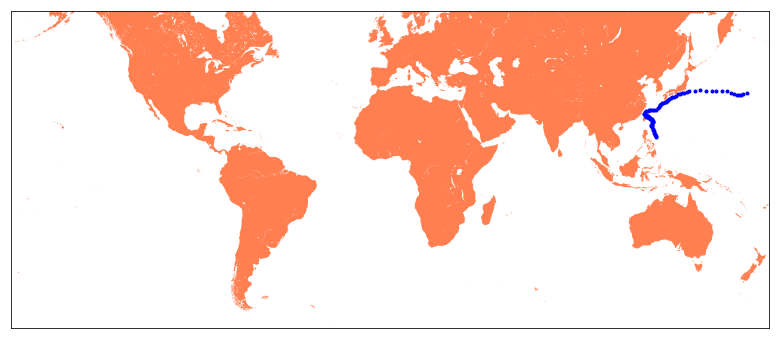

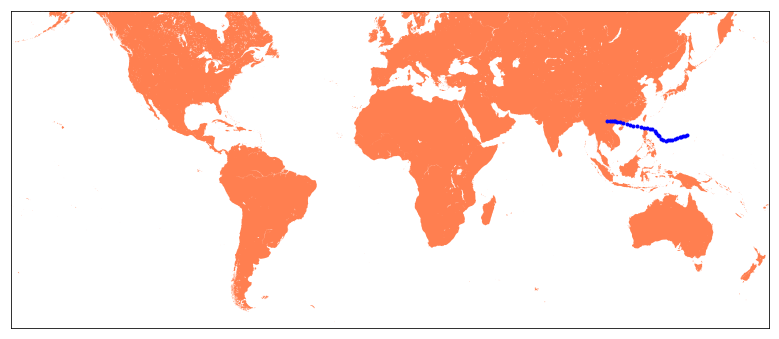

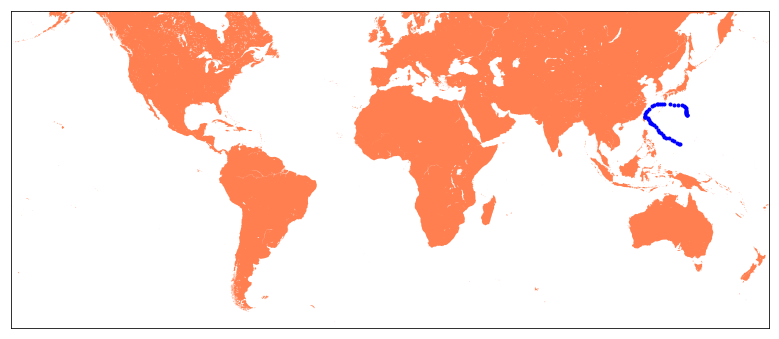

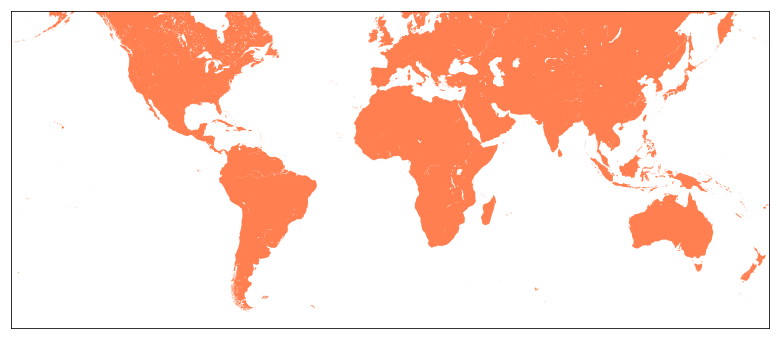

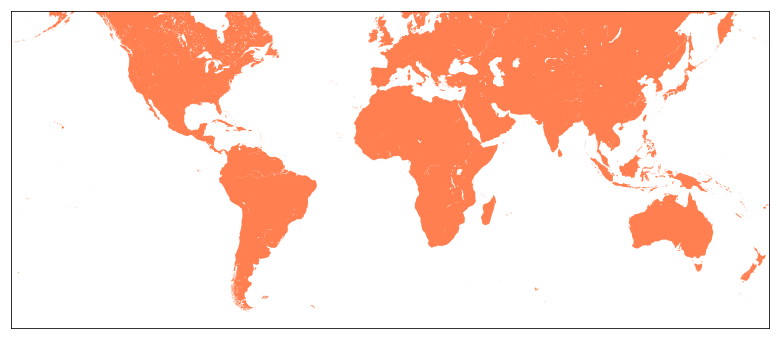

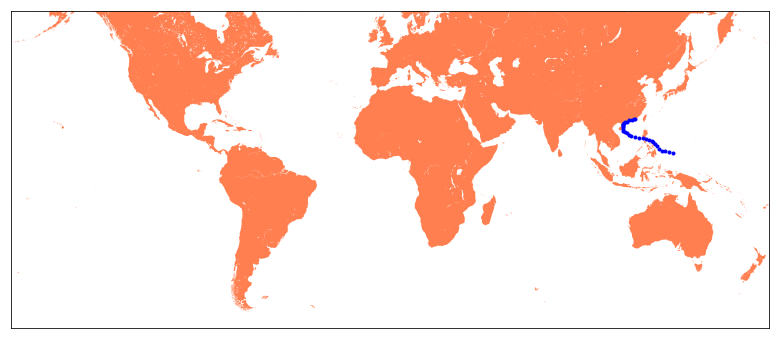

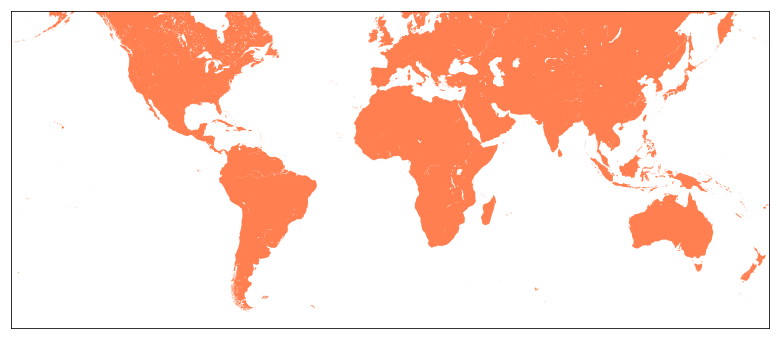

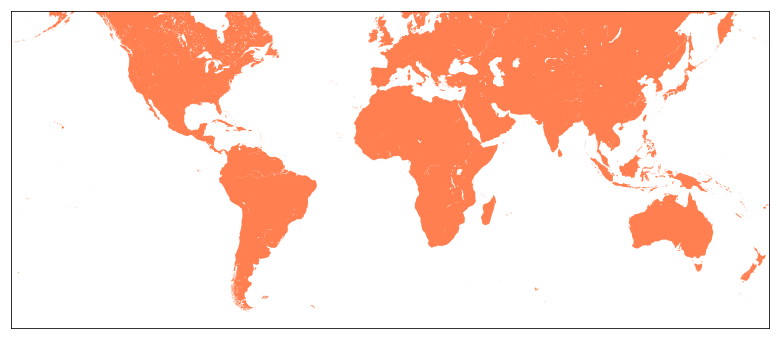

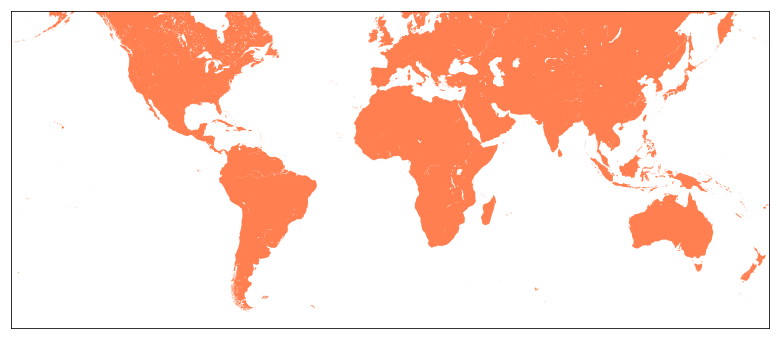

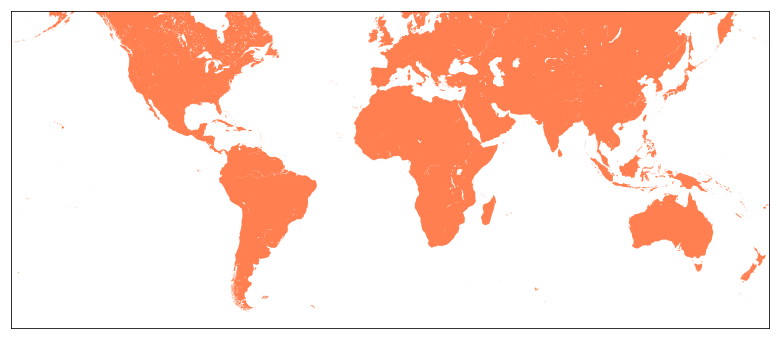

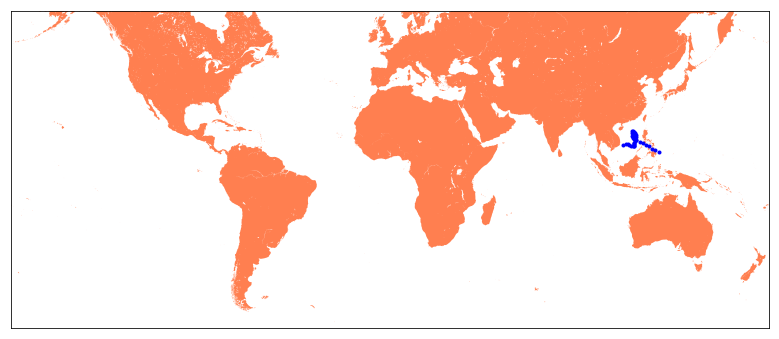

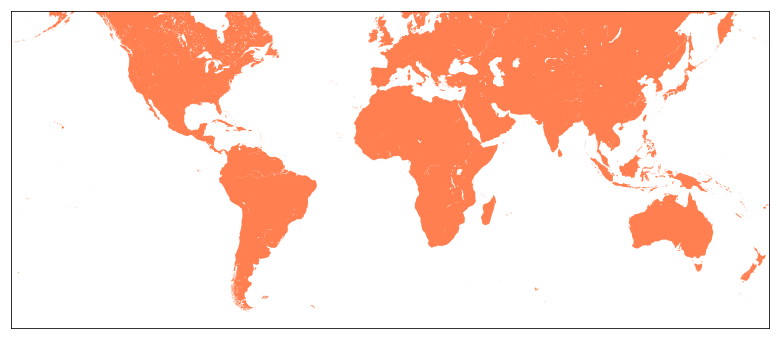

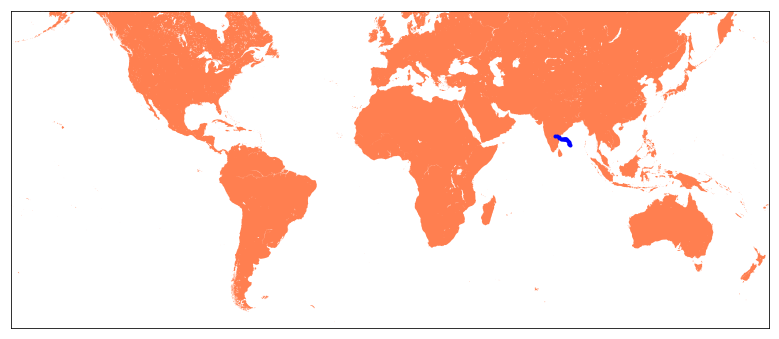

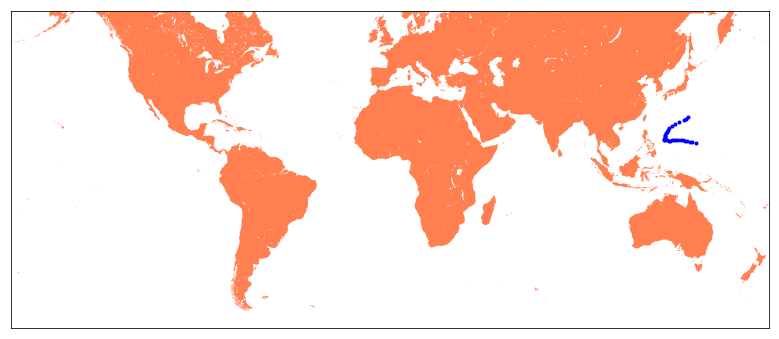

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
for root, dirs, files in os.walk(dir_in, topdown=False):
    for name in files:
        fname_in=os.path.join(root, name)
        fname_mur=dir_out + fname_in[31:39] + '_sst.nc'
        fname_ccmp=dir_out + fname_in[31:39] + '_ccmp_wnd.nc'
        iyr_storm=int(fname_in[31:35])
        if iyr_storm<2008 or iyr_storm>2008:
            continue

        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat
        lons = dsx.lon

        fig = plt.figure(figsize=(11.7,8.3))
            #Custom adjust of the subplots
        plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
        ax = plt.subplot(111)

            #Let's create a basemap of the world
        m = Basemap(projection='merc', lat_0 = 0, lon_0 = 0,    resolution = 'l', area_thresh = 0.1,    
                          llcrnrlon=-180.25, llcrnrlat=-60.0,urcrnrlon=180.0, urcrnrlat=60.)
        m.fillcontinents(color='coral',lake_color='white')


        x,y = m(lons.values,lats.values)
        m.plot(x, y, 'bo-', markersize=3, linewidth = 4)

        #plt.show()
        fig_fname="f:/data/tc_wakes/database/sst/" + fname_in[31:39] + ".png"
        fig.savefig(fig_fname, transparent=False, format='png')
        print(fig_fname)


In [41]:
print(lats.values)

[[-4.4999999  -4.69999989 -4.79999989 -4.5999999  -4.3999999  -4.2999999
  -4.19999991 -4.2999999  -4.3999999  -4.3999999  -4.3999999  -4.3999999
  -4.69999989 -4.99999989 -5.29999988 -5.59999987 -5.79999987 -5.99999987
  -6.09999986 -6.19999986 -6.39999986 -6.49999985 -6.89999985 -6.99999984
  -6.09999986 -5.59999987]]
